# POLICE SHOOTING CASES IN USA 2015-2020

<img src="police brutality.jpg">

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, **a vast number of cases go unreported.**

The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

* Note: **This dataset was last updated on 2020-06-15**.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.express as px
sns.set(rc={'figure.figsize':(8,5)})

In [2]:
df = pd.read_csv("shootings.csv")

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [5]:
# no missing values found
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name
df['week'] = df['date'].dt.week
df['monthname'] = df['date'].dt.month_name()
df['weekdayname'] = df['date'].dt.day_name()

### KILLINGS PER MONTH

The peak of killings is Jan and Feb with drastic reduction in other months of the year.

In [33]:
data = {'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       'count':[505,503,462,430,418,413,399,371,367,354,345,328]}
# Create DataFrame 
df_month = pd.DataFrame(data) 

Text(0, 0.5, 'Frequency')

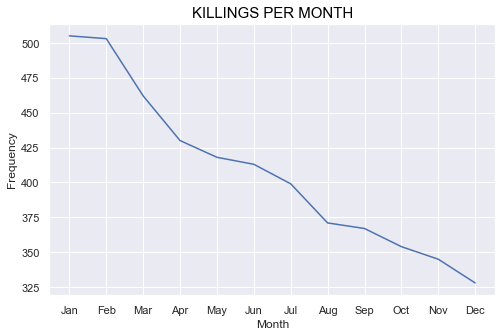

In [46]:
ax = sns.lineplot(data=df_month, x="Month", y="count", sort=False)
ax.set_title('KILLINGS PER MONTH', color = 'Black',fontsize=15)
ax.set_ylabel('Frequency')

### KILLINGS PER YEAR

Despite the unpredictable events that lead to fatal shootings, police nationwide have shot and killed almost the same number of people annually — nearly 1,000, except 2020 that is still in view.

In [38]:
data = {'Year':[2015, 2016, 2017, 2018, 2019, 2020],
       'count':[965, 904, 906, 888, 858, 374]}
# Create DataFrame 
df_year = pd.DataFrame(data) 

Text(0, 0.5, 'Frequency')

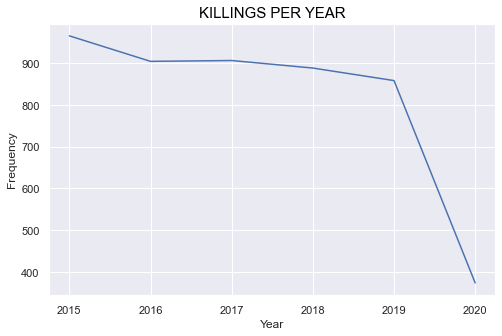

In [47]:
ax = sns.lineplot(data=df_year, x="Year", y="count")
ax.set_title('KILLINGS PER YEAR', color = 'Black',fontsize=15)
ax.set_ylabel('Frequency')

In [53]:
# x = pd.DataFrame(df.groupby(['year', 'monthname'])['id'].count().reset_index())

In [54]:
# ax = sns.lineplot(data=x, x="year", y="id", hue="monthname", sort=False)
# ax.set_title('KILLINGS ON MONTHLY BASIS', color = 'Black',fontsize=15)
# ax.set_ylabel('Frequency')

### KILLINGS PER EACH DAY OF THE WEEK

Peak of killings occur on Wednesdays with Saturdays being the least.

Text(0.5, 0, 'Days')

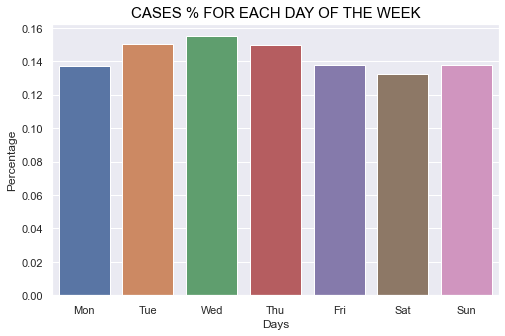

In [85]:
count = df['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax)
ax.set_title('CASES % FOR EACH DAY OF THE WEEK', color = 'Black',fontsize=15)
ax.set_ylabel('Percentage')
ax.set_xlabel('Days')

### KILLINGS BY RACE FROM 2015 TO 2020

* According to [census.gov](https://www.census.gov/quickfacts/fact/table/US/PST045219) 60% of Americans are white, 18% are Hispanic/Latino and 13% are Black. Given that the White population is over 4 times bigger than the Black population, it is expected to see more Whites shot.

Text(0.5, 17.200000000000003, 'Race')

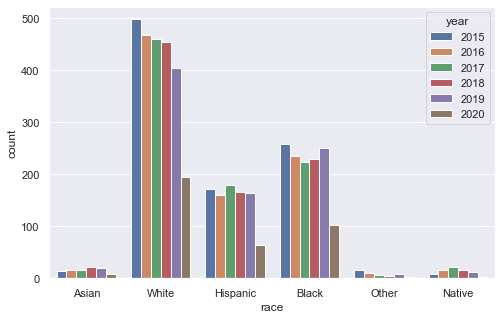

In [86]:
sns.countplot(x='race', data=df, hue='year')
ax.set_title('KILLINGS BY RACE FROM 2015 TO 2020', color = 'Black',fontsize=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Race')

### GENDER BY MANNER OF DEATH

An overwhelming majority of people shot and killed by police are male — over 95 percent.

Text(0.5, 1.0, 'GENDER BY MANNER OF DEATH')

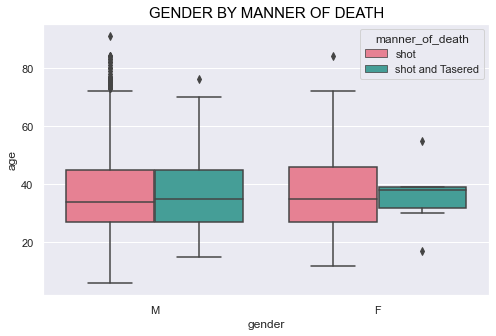

In [89]:
ax = sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df, palette="husl")
ax.set_title("GENDER BY MANNER OF DEATH", color = 'Black',fontsize=15)

### MOST ENDANGERED RACE

Text(0, 0.5, 'Frequency')

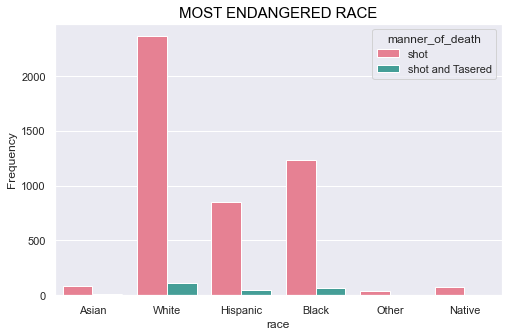

In [18]:
ax = sns.countplot(x='race', data= df, hue='manner_of_death', palette="husl")
ax.set_title('MOST ENDANGERED RACE', color = 'Black',fontsize=15)
ax.set_ylabel('Frequency')

### AGE OF KILLED PEOPLE

More than half the victims are between 20 and 40 years old

In [20]:
age_group = []
for i in df.age:
    if i >= 20 and i <= 40:
        age_group.append('20-40')
    elif i > 40:
        age_group.append('above 40')
    else:
        age_group.append('below 20')

df["age group"] = age_group  

Text(0.5, 1.0, 'AGE GROUP OF PEOPLE KILLED')

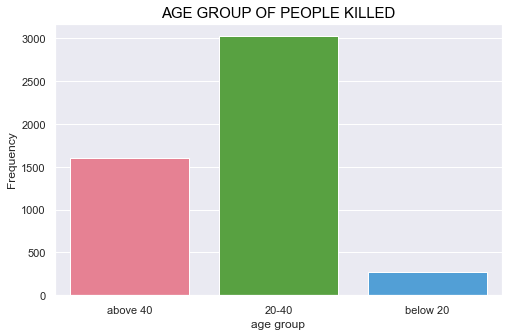

In [88]:
sns.countplot(x=df['age group'], palette="husl")
plt.ylabel('Frequency')
plt.title('AGE GROUP OF PEOPLE KILLED',color = 'Black',fontsize=15)

Text(0.5, 1.0, 'AGE DISTRIBUTION')

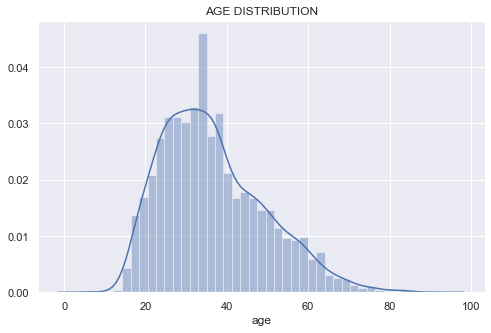

In [22]:
sns.distplot(df.age)
plt.title('AGE DISTRIBUTION')

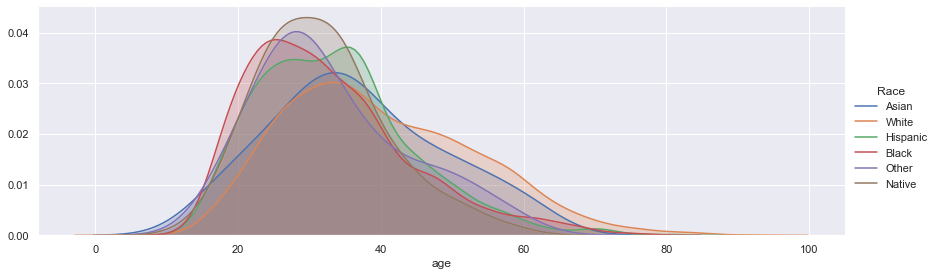

In [29]:
f = sns.FacetGrid(data=df, hue="race", aspect=3, height=4)
f.map(sns.kdeplot, "age", shade=True)
f.add_legend(title="Race")
# fig.title('AGE DISTRIBUTION BY RACE')

### KILLINGS BY STATE

In [102]:
states_cases = pd.DataFrame({'state':df.state.value_counts().index,'cases':df.state.value_counts().values})

fig = px.choropleth(states_cases, locations='state', locationmode='USA-states', color='cases',
                           range_color=(states_cases.cases.min(),states_cases.cases.max()),
                           scope="usa",
                           color_continuous_scale='reds', 
                           title='antani'
                          )
fig.update_layout(title='Cases by States', title_x=0.5)

### TOP 10 STATES WITH THE MOST KILLINGS 

Text(0.5, 1.0, 'TOP 10 STATES WITH THE MOST KILLINGS')

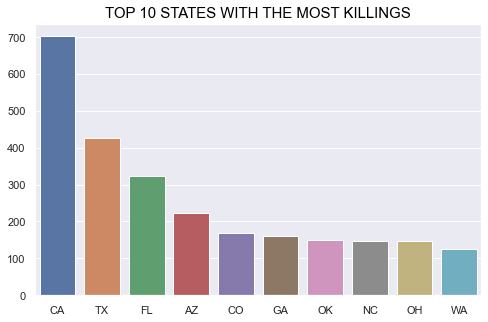

In [103]:
state = df.state.value_counts()
sns.barplot(x=state[:10].index,y=state[:10].values)
plt.title('TOP 10 STATES WITH THE MOST KILLINGS',color = 'black',fontsize=15)

### TOP 10 CITIES WITH THE MOST KILLINGS 

Text(0.5, 1.0, 'TOP 10 CITIES WITH THE MOST KILLINGS')

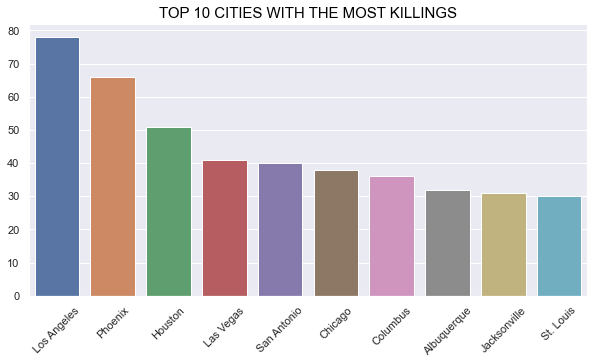

In [104]:
city = df.city.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=city[:10].index,y=city[:10].values)
plt.xticks(rotation=45)
plt.title('TOP 10 CITIES WITH THE MOST KILLINGS',color = 'Black',fontsize=15)

### BOTTOM 10 STATES STATES WITH THE LEAST KILLINGS 

Text(0.5, 1.0, 'STATES WITH THE LEAST KILLINGS')

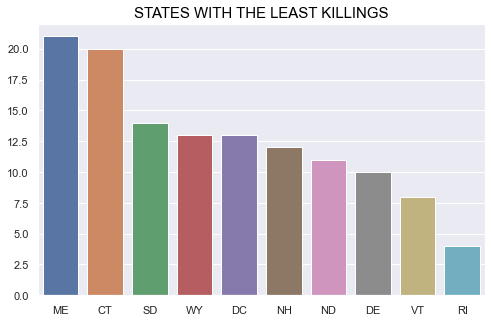

In [106]:
state = df.state.value_counts()
sns.barplot(x=state[-10:].index,y=state[-10:].values)
plt.title('STATES WITH THE LEAST KILLINGS',color = 'black',fontsize=15)

### TOP 10 ARMS FOUND ON VICTIMS

Text(0.5, 1.0, 'TOP 10 ARMS FOUND ON VICTIMS')

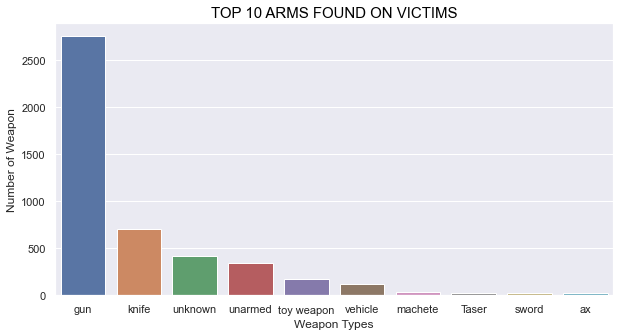

In [105]:
armed = df.armed.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=armed[:10].index,y=armed[:10].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('TOP 10 ARMS FOUND ON VICTIMS',color = 'Black',fontsize=15)

### MOST USED ARM BY GENDER

Text(0.5, 0, 'Frequency')

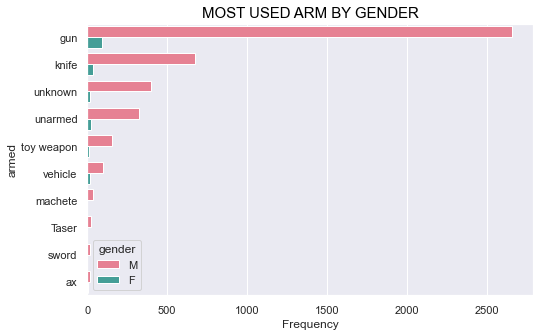

In [95]:
ax = sns.countplot(y="armed", data=df, hue= "gender",palette="husl", order = df['armed'].value_counts().nlargest(10).index)
ax.set_title('MOST USED ARM BY GENDER', color = 'Black',fontsize=15)
ax.set_xlabel("Frequency")

### HAVING MENTAL ILLNESS OR NOT 

Only in 20% of cases victims had signs of mental instability

Text(0.5, 1.0, 'HAVING MENTAL ILLNESS OR NOT')

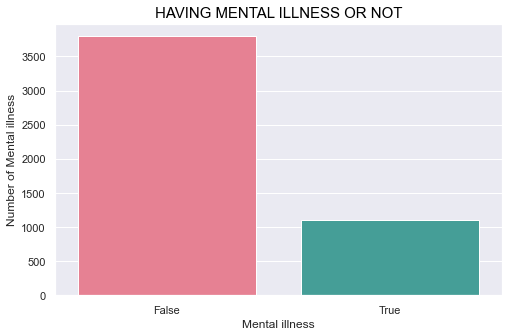

In [97]:
sns.countplot(x = 'signs_of_mental_illness', data=df, palette="husl")
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('HAVING MENTAL ILLNESS OR NOT',color = 'black', fontsize = 15)

### THREAT TYPES BY VICTIMS

Text(0.5, 1.0, 'THREAT TYPES BY VICTIMS')

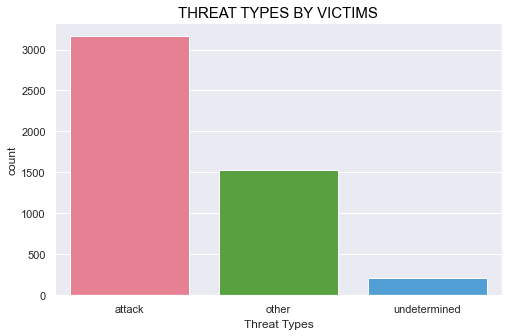

In [107]:
sns.countplot(df.threat_level, palette="husl")
plt.xlabel('Threat Types')
plt.title('THREAT TYPES BY VICTIMS',color = 'black', fontsize = 15)

### FLEE TYPES 

Text(0.5, 1.0, 'FLEE TYPES')

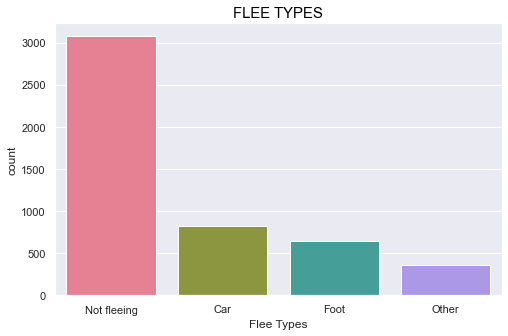

In [108]:
sns.countplot(df.flee, palette="husl")
plt.xlabel('Flee Types')
plt.title('FLEE TYPES', color = 'black', fontsize = 15)

### HAVING BODY CAMERAS OR NOT FOR POLICE 

In only 10% of cases policeman had the body camera

Text(0.5, 1.0, 'HAVING BODY CAMERAS OR NOT FOR POLICE')

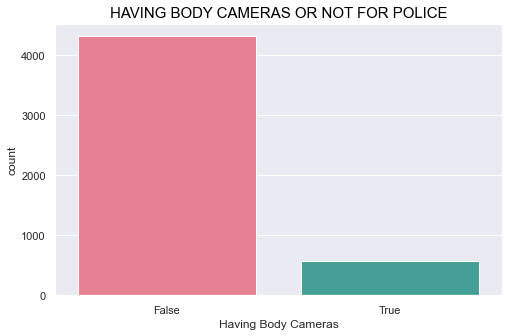

In [109]:
sns.countplot(df.body_camera, palette="husl")
plt.xlabel('Having Body Cameras')
plt.title('HAVING BODY CAMERAS OR NOT FOR POLICE',color = 'black',fontsize = 15)

### DEATHS BY GENDER, AGE AND MANNER OF DEATH

Text(0.5, 1.0, 'DEATHS BY GENDER, AGE AND MANNER OF DEATH')

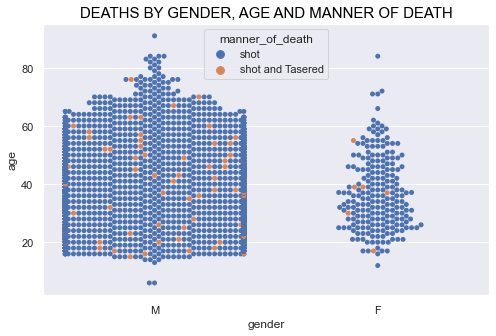

In [110]:
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=df)
plt.title('DEATHS BY GENDER, AGE AND MANNER OF DEATH',color = 'black',fontsize = 15)